In [2]:
import lensing
from importlib import reload
reload(lensing)
from lensing import *
import matplotlib.pyplot as plt
from astropy.convolution import convolve, AiryDisk2DKernel
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord

In [16]:
x_deflections = open_fits('0000_dx.fits')
y_deflections = open_fits('0000_dy.fits')
deflections_grid = grid((0,0),6000,0.031)

hdu_dx = fits.open('0000_dx.fits')
hdu_dy = fits.open('0000_dy.fits')

dx_header = hdu_dx[0].header
dy_header = hdu_dy[0].header

In [17]:
dx_header["CDELT1"] = dx_header["CDELT1"]*3
dx_header["CDELT2"] = dx_header["CDELT2"]*3
dy_header["CDELT1"] = dy_header["CDELT1"]*3
dy_header["CDELT2"] = dy_header["CDELT2"]*3

In [25]:
w = WCS(dx_header)
c = SkyCoord(ra=93.9795443, dec=-57.7723101, unit='deg',frame="fk5")
arc_center = w.world_to_pixel(c)
print(f"arc center pixel coordinates: {arc_center[0]}, {arc_center[1]}")

arc center pixel coordinates: 1664.310384938136, 4420.873927815218


## Convergence and Magnification

In [37]:
# lens redshift 0.972
magnification = magnification_from_deflections(deflections_grid, x_deflections, y_deflections, deflections_grid)
convergence = convergence_from_deflections(deflections_grid, x_deflections, y_deflections, deflections_grid)

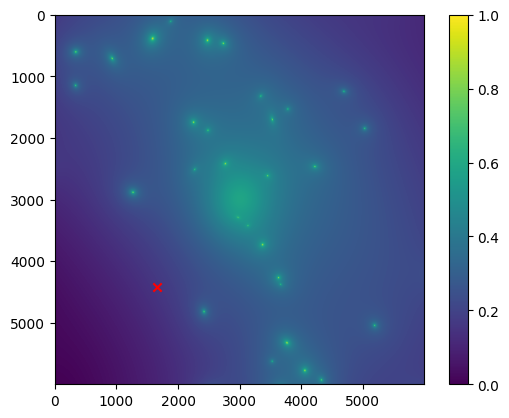

In [43]:
plt.imshow(np.log10(convergence))
plt.scatter(1664,4420,marker='x',color='red')
plt.colorbar()

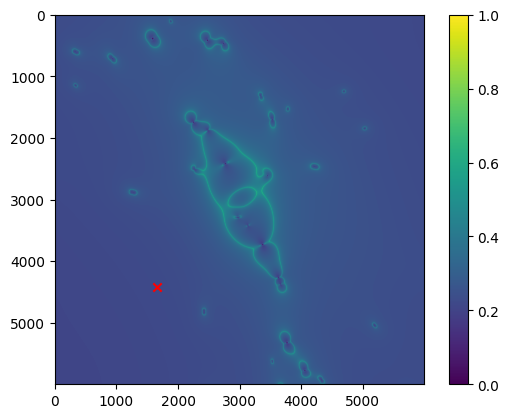

In [44]:
plt.imshow(np.log10(magnification))
plt.scatter(1664,4420,marker='x',color='red')
plt.colorbar()

In [153]:
#hdu = fits.open("glafic-model/hlsp_relics_hst_acs-wfc3ir_whl0137-08_multi_v1_color.fits")
#photplam = hdu[0].header["PHOTPLAM"] # pivot wavelength in Angstroms
#photflam = hdu[0].header["PHOTFLAM"] # inverse sensitivity in erg/s/cm^2/Angstrom
#exptime = hdu[0].header["EXPTIME"] # exposure time in seconds
# from astropy import units as u
# data = (data * (u.erg / u.s / u.cm**2 / u.Angstrom)).to(u.Jy,equivalencies=u.spectral_density(photplam * u.AA))

In [3]:
hdu = fits.open("Cropped-f200w.fits") # 10 nJy
image = hdu[0].data

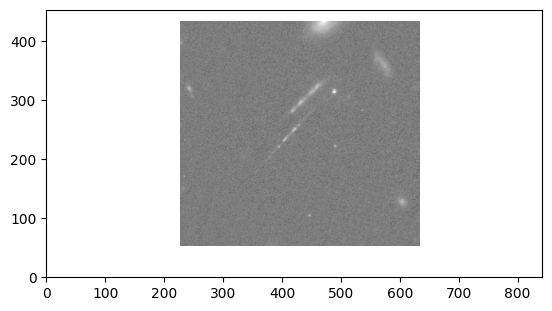

In [4]:
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize

norm = ImageNormalize(stretch=LogStretch())
plt.imshow(image, norm=norm, origin='lower', cmap='Greys_r')